In [1]:
import numpy as np              # 1.15.4
import pandas as pd             # 0.23.4
import matplotlib.pyplot as plt # 3.0.2
import seaborn as sns           # 0.9.0

%config InlineBackend.figure_format = 'svg'

In [2]:
# Чтобы вывод был без лишней информации

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/bikes_rent.csv')

In [4]:
y = df['cnt']

In [5]:
X = df.drop(columns=['cnt'])

### Задания:
#### • Постройте графики зависимостей целевого признака от остальных

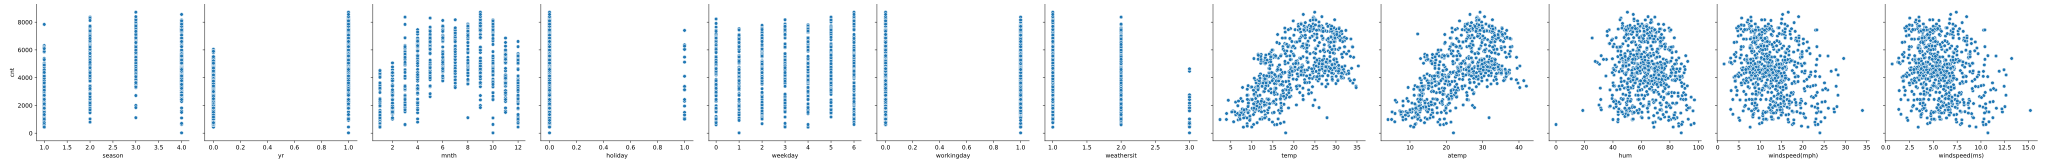

In [6]:
pairplot = sns.pairplot(df, x_vars=X.columns, y_vars=y.name, height=4)

#### • Каков характер зависимости числа прокатов от месяца?

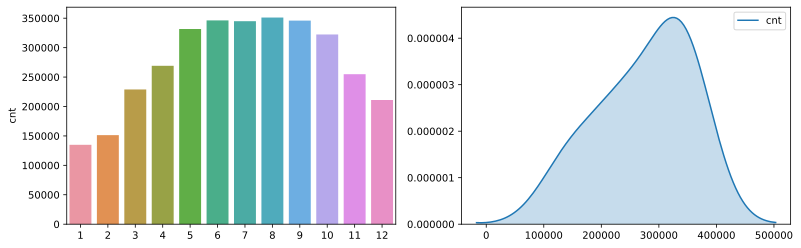

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

hist = sns.barplot(x=df['mnth'].unique(), y=df.groupby('mnth').sum()['cnt'], ax=ax[0])
dens = sns.kdeplot(df.groupby('mnth').sum()['cnt'], shade=True, ax=ax[1])

__Ответ:__ С мая по сентябрь, так сказать, в "сезон" - побольше, зимой - поменьше.

#### • От какого признака число прокатов зависит линейно?
__Ответ:__ Более-менее от температуры (неважно, `temp` или `atemp`, они коррелируют между собой), если иметь ввиду статистическую зависимость

#### • Оцените уровень линейной зависимости между признаками и целевой переменной
Для этого можно рассмотреть корреляционную матрицу. Если в расчете матрицы использовать линейный коэффициент корреляции (Пирсона), который является мерой линейной зависимости, его значение можно интерпретировать как ответ на этот вопрос.

In [8]:
df.corr(method='pearson')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


__Ответ:__ Мы наблюдаем значимую лин. зависимость между температурой (`temp` | `atemp`) и целевой переменной (`cnt`). Также видно более слабую лин. зависимость от сезона (`season`). Её слабость можно объяснить тем, что в благоприятном климате (а по нашим данным, средняя температура зимой __(!)__ в районе 10 градусов, явно не средняя полоса России) кататься на велосипеде можно круглый год, вне зависимости от сезона. Также видно лин. зависимость от года (`yr`), что, может иметь множество причин: от года открытия нашей компании, например, в 2010 (поэтому никто еще не знал, кто мы есть), до более продуманной рекламной кампании в 2012 году. Погодные условия в 2011 и 2012 годах не отличаются, поэтому причиной они являться не могут.

#### • Оцените масштаб разброса значений признаков
Рассмотрим только числовые признаки (смотреть на разброс, например, `weekday` - бесполезно, это категориальный признак, при предобработке данных с такими будем работать отдельно)

In [9]:
pd.DataFrame(data=df.std()[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']], columns=['Deviation'])

,Deviation
temp,7.505091
atemp,8.148059
hum,14.242910
windspeed(mph),5.192357
windspeed(ms),2.321125


__Ответ:__ Мы нашли среднеквадатичное отклонение от среднего по каждому признаку. Так как оно измеряется в той же величине, что и сам признак (т.е. отклонение от средней скорости ветра `windspeed(mph)` примерно 5.2 мили в час), мы видим масштаб разброса значений признаков. _P.S. Все равно отмасштабируем потом._

#### • Проведите дополнительные мероприятия, которые считаете нужными, по предобработке данных и обучите линейную регрессию

In [10]:
# scikit-learn 0.20.1, scipy 1.1.0 (неявно в sklearn)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

Будем отдельно обрабатывать числовые и категориальные признаки (выделять бинарные отдельно - не будем). Найдем логические индексы для таких признаков, они помогут разделить данные при построении пайплайна обучения.

In [11]:
data = X.copy()

numeric_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_inds = np.array([(feature in numeric_features) for feature in data.columns], dtype = bool)
cat_inds = np.array([(feature in categorical_features) for feature in data.columns], dtype = bool)

Построим пайплайн обучения, объединяя шаги масштабировния (стандартизации, `StandartScaler`) для числовых признаков, `One-Hot Encoding` - для категориальных и, собственно, обучение модели (`LinearRegression`) в один непрерывный процесс. Так как мы разбиваем исходные данные по типу признаков, нам необходимо сначала выделить признаки нужного типа, обработать их, а затем "склеить" обратно в один датасет. Для этого используем `FunctionTransformer`, и `FeatureUnion`.

In [12]:
linear_model = Pipeline([
    ('features', FeatureUnion([
        ('numeric', Pipeline([
            ('selecting', FunctionTransformer(lambda data: data.values[:, num_inds], validate=False)),
            ('scaling', StandardScaler())])),
        ('categorical', Pipeline([
            ('selecting', FunctionTransformer(lambda data: data.values[:, cat_inds], validate=False)),
            ('one-hot_encoding', OneHotEncoder(handle_unknown='ignore'))])),])),
    ('model', LinearRegression())])

Оценим качество модели по кросс-валидации. Будем смотреть на какое, в среднем, число прокатов мы ошибаемся (`MAE`).

In [13]:
cross_val_score(linear_model, data, y, cv=5, scoring='neg_mean_absolute_error').mean()

-713.6413761102631

Т.е. мы ошибаемся, в среднем, на 714 велосипедов. Учитывая, что `y.mean() ~= 4504`, не так уж и хорошо мы предсказываем.

_P.S. На знак минус в нашем случае можно не обращать внимание. Это особенность работы_ `cross_val_score`_, которая зачастую используется для подбора гиперпараметров вместе с задачей максимизации заданной метрики. Т.к. у нас с улучшением качества модели метрика уменьшается, а не растет, её удобно умножить на -1, и продолжать максимизацию._

#### • Обучите регрессоры Ridge и Lasso с параметрами по умолчанию

Так как данные остаются прежними, используем наш пайплайн с новыми моделями.

In [14]:
ridge_model = Pipeline([
    ('features', FeatureUnion([
        ('numeric', Pipeline([
            ('selecting', FunctionTransformer(lambda data: data.values[:, num_inds], validate=False)),
            ('scaling', StandardScaler())])),
        ('categorical', Pipeline([
            ('selecting', FunctionTransformer(lambda data: data.values[:, cat_inds], validate=False)),
            ('one-hot_encoding', OneHotEncoder(handle_unknown='ignore'))])),])),
    ('model', Ridge())])

cross_val_score(ridge_model, data, y, cv=5, scoring='neg_mean_absolute_error').mean()

-703.7634751490957

In [15]:
lasso_model = Pipeline([
    ('features', FeatureUnion([
        ('numeric', Pipeline([
            ('selecting', FunctionTransformer(lambda data: data.values[:, num_inds], validate=False)),
            ('scaling', StandardScaler())])),
        ('categorical', Pipeline([
            ('selecting', FunctionTransformer(lambda data: data.values[:, cat_inds], validate=False)),
            ('one-hot_encoding', OneHotEncoder(handle_unknown='ignore'))])),])),
    ('model', Lasso())])

cross_val_score(lasso_model, data, y, cv=5, scoring='neg_mean_absolute_error').mean()

-709.8726597118139

#### • Как меняются веса при увеличении коэффициента регуляризации?

Исходя из смысла регуляризации, а также вида нашей оптимизационной задачи после добавления регуляризотора (для примера $\normalsize L_2$-регуляризатор):
$$\normalsize \frac{1}{n} \large\lVert(Xw - y)\rVert^2 + \lambda\lVert w\rVert^2 \to\min\limits_{w}$$
можно говорить о том, что при увеличении коэффициента регуляризации $\normalsize\lambda$ веса уменьшаются (модель становится проще).

В этом можно убедиться, посмотрев изменение весов нашей модели. Выведем вектор весов $\normalsize w$ гребневой регрессии и его норму для значений $\normalsize\lambda$ равных 1, 10, 100 и 800.

In [16]:
for alpha in (1, 10, 100, 800):
    ridge_model.set_params(model__alpha=alpha, model__random_state=42)
    ridge_model.fit(data, y)
    w = ridge_model.named_steps['model'].coef_
    print('w:', np.round(w, 2), '\nНорма:', np.linalg.norm(w), '\n')

w: [  516.84   313.09  -225.41  -110.55  -110.55  -901.96     6.99   -69.71
   629.84 -1173.87   839.03  -351.7   -228.68   159.32    45.76   320.02
   100.97  -366.93    49.11   616.13   178.44  -436.71  -420.57     6.16
  -341.    -187.56  -210.54  -113.98   -44.75   -38.41    14.94   245.46
  -283.11   -51.74   668.81   215.53 -1219.18] 
Норма: 2702.85398863287 

w: [  487.31   402.12  -257.56  -118.67  -118.67  -808.98    97.09   -63.03
   522.89 -1107.77   855.74  -296.65  -203.17   108.47   -12.96   214.44
    14.44  -375.23    19.6    546.8    254.36  -244.53  -277.59    15.04
  -267.07  -170.68  -183.48   -90.63   -37.47   -21.94    39.03   213.14
  -224.61   -27.42   520.34   119.08  -891.45] 
Норма: 2354.935668629868 

w: [ 473.53  471.04 -268.12 -132.41 -132.41 -506.7   128.1   -34.15  332.53
 -836.98  756.76 -197.9  -150.47    4.74    5.76   97.17    9.45 -181.5
    7.02  244.56  182.68  -10.9   -90.82    8.87  -89.09 -102.61  -92.86
  -31.78  -13.59   11.26   52.72   96.64

__Что и требовалось показать.__

#### • Какой из регуляризаторов подойдет для отбора неинформативных признаков?

__Ответ:__ $\normalsize L_1$, он же $\normalsize Lasso$. Он отбирает наиболее __информативные__ признаки, зануляя остальные. Приведем пример

In [17]:
lasso_model.set_params(model__alpha=555, model__random_state=42)
lasso_model.fit(data, y)
w = lasso_model.named_steps['model'].coef_
np.round(w, 2)

array([  0.  , 666.67,  -0.  ,  -0.  ,  -0.  ,  -0.  ,   0.  ,   0.  ,
         0.  ,  -0.  ,   0.  ,  -0.  ,  -0.  ,  -0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  -0.  ,   0.  ,
        -0.  ,  -0.  ,  -0.  ,  -0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
        -0.  ,   0.  ,   0.  ,  -0.  ,  -0.  ])

_Мы видим единственный признак при большом коэффициенте регуляризации. Интересно, что это_ `atemp` _- признак, лин. зависимость от которого целевой переменной, была наибольшей._

#### • Проведите кросс валидацию и оцените итоговый результат

In [18]:
ridge_model.set_params(model__alpha=9)
cross_val_score(ridge_model, data, y, cv=5, scoring='neg_mean_absolute_error').mean()

-683.1297164212612

__Ответ__: Предобработка данных и небольшой перебор параметров ("за кадром"), не привели к существенному улучшению результата. Из этого можно сделать вывод, что мы выбрали семейство алгоритмов, которое не способно выучить закономерности в наших данных, иными словами, наши модели слишком простые для этого. По большому счету, мы уже знали, что линейные модели будут не очень хорошо работать на наших данных. Узнали мы об этом в тот момент, когда оценили линейную зависимость между признаками и таргетом. Напомню: с ней там было очень плохо.